In [1]:
import pydicom
# import SimpleITK #alt to pydicom
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# dcm_meta = pydicom.read_file("/apps/local/shared/HC701/Labs/Lab_01/X-Ray/5fe5d4052587.dcm")
dcm_meta = pydicom.read_file("./code/data/X-Ray/5fe5d4052587.dcm")
dcm_meta # prints metadata

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.48077146291074622612719093706929718448
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: 03a65300fa41
(0008, 0018) SOP Instance UID                    UI: 5fe5d4052587
(0008, 0020) Study Date                          DA: '3a8198b5bebe'
(0008, 0030) Study Time                          TM: '7577a8f1e51c'
(0008, 0050) Accession Number                    SH: '88d614fe9631'
(0008, 0060) Modality                            CS: 'CR'
(0010, 0010) Patient's Name                      PN: 'd7c53b81073a'
(0010, 0020) P

In [4]:
dcm_img = dcm_meta.pixel_array
dcm_img

array([[1750, 1625, 1480, ..., 1366, 1335, 1287],
       [1718, 1643, 1552, ..., 1196, 1201, 1221],
       [1709, 1677, 1399, ..., 1092, 1031, 1056],
       ...,
       [1433, 1332, 1065, ..., 4062, 4000, 4032],
       [1506, 1417, 1348, ..., 3998, 4057, 4019],
       [1617, 1539, 1465, ..., 4078, 4075, 4071]], dtype=uint16)

0 4095
(3480, 4240)


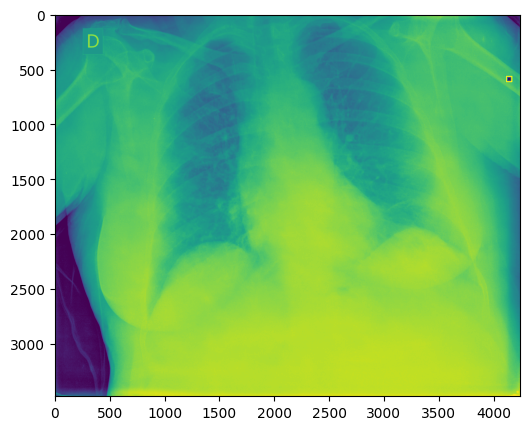

In [5]:
print(np.min(dcm_img), np.max(dcm_img))
print(dcm_img.shape)

plt.figure(figsize=(6,6))
plt.imshow(dcm_img)
plt.show()

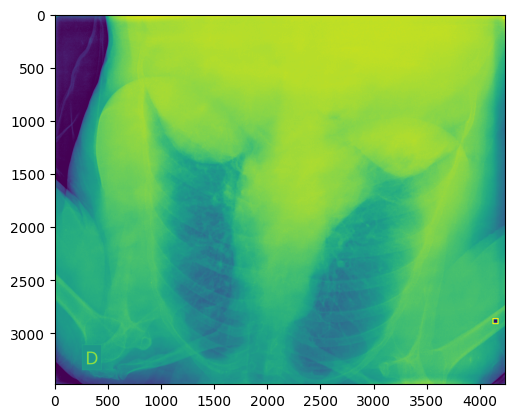

In [6]:
## IMPORTANT: In pydicom, X&Y are flipped... [Y,X] (in reg img, [X,Y])
new_img = dcm_img[-1:0:-1, :] #flip img alg y-axis in increments of -1 
plt.imshow(new_img)
plt.show()

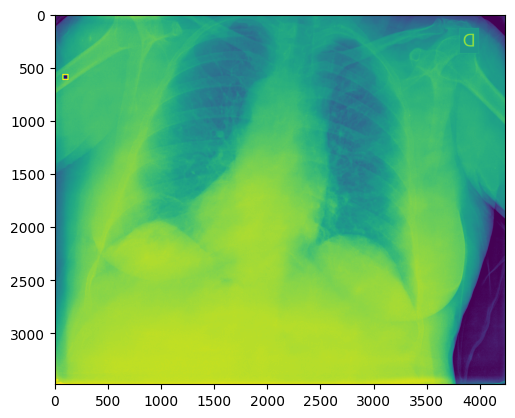

In [7]:
## IMPORTANT: In pydicom, X&Y are flipped... [Y,X]
# (in reg img, [X,Y])
new_img = dcm_img[:, -1:0:-1] #flip img alg x-axis in increments of -1 
plt.imshow(new_img)
plt.show()

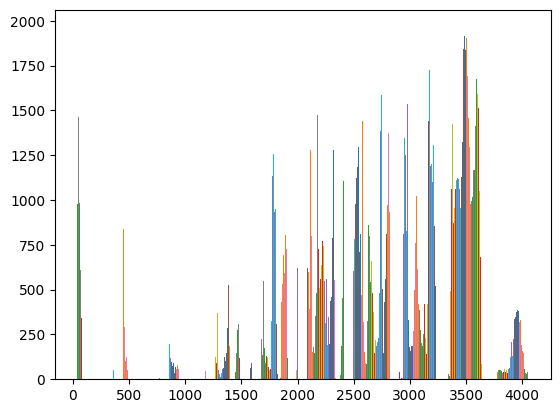

In [8]:
# 1.  Generate a pixel intensity histogram comparing a NIFTI image with a DICOM image (note: NIFTI histogram is shown in lab_CT.ipynb).
plt.hist(dcm_img)
plt.show()
# wrong plot! need to flatten the array

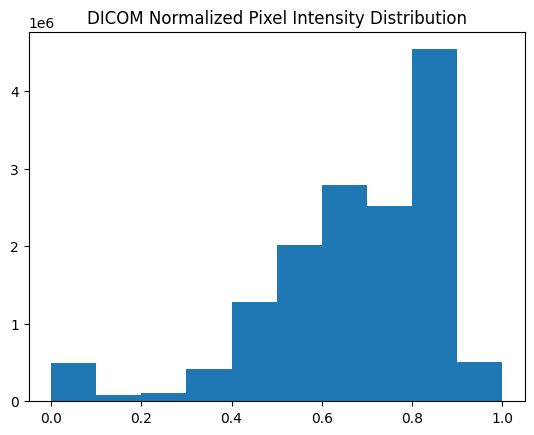

[[0.42735043 0.3968254  0.36141636 ... 0.33357753 0.32600733 0.31428571]
 [0.41953602 0.401221   0.37899878 ... 0.29206349 0.29328449 0.2981685 ]
 [0.41733822 0.40952381 0.34163614 ... 0.26666667 0.25177045 0.25787546]
 ...
 [0.34993895 0.32527473 0.26007326 ... 0.99194139 0.97680098 0.98461538]
 [0.36776557 0.34603175 0.32918193 ... 0.97631258 0.99072039 0.98144078]
 [0.39487179 0.37582418 0.35775336 ... 0.9958486  0.995116   0.99413919]]


In [9]:
# 2.  Normalize the pixel values of the NIFTI and DICOM images to values between 0 and 1.
max_dcm = np.max(dcm_img)
norm_dcm = np.divide(dcm_img,max_dcm)

norm_dcm_img_hist = norm_dcm.flatten()
plt.hist(norm_dcm_img_hist)
plt.title('DICOM Normalized Pixel Intensity Distribution')
plt.show()

print(norm_dcm)

(128, 128)


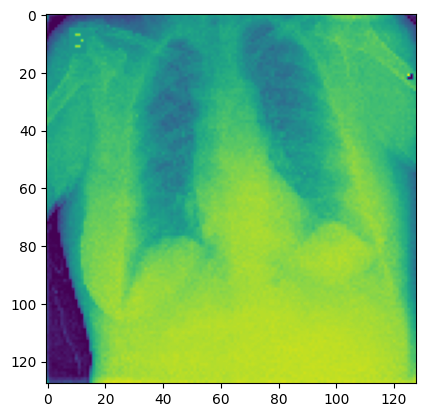

In [10]:
# 3. Scale the DICOM image down to 128x128 using Nearest Neighbour interpolation
dcm_resize128 = cv2.resize(dcm_img, dsize=(128,128), interpolation = cv2.INTER_NEAREST)

print(dcm_resize128.shape)
plt.imshow(dcm_resize128)
plt.show()

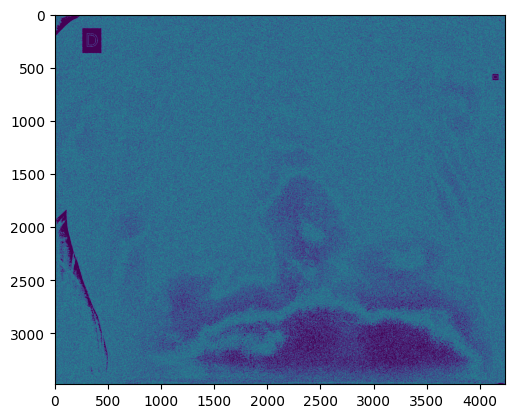

In [11]:
# EXTENDED ACTIVITY
# 1. From the DICOM image, detect the edges in the image and visualize the output.
## ATTEMPT #1: Using Canny
dcm_imgCopy = np.uint8(dcm_img)
dcm_edge = cv2.Canny(dcm_imgCopy, threshold1=252, threshold2=253)
# dcm_edge = cv2.Sobel(src=dcm_img, ddepth=cv2.CV_64F, dx=1, dy=0)#, ksize=5)
plt.imshow(dcm_edge)
plt.show()

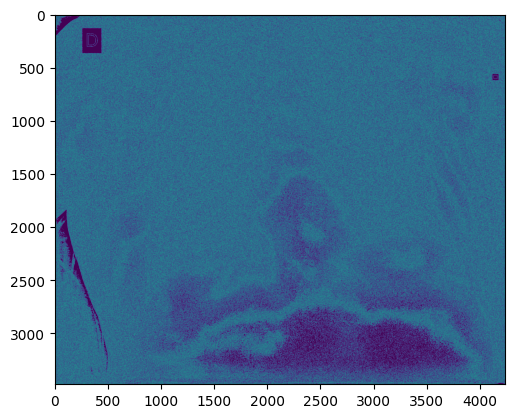

In [12]:
## ATTEMPT #2: Using Canny
dcm_edge = cv2.Canny(dcm_imgCopy, threshold1=254.99999, threshold2=255)
plt.imshow(dcm_edge)
plt.show()

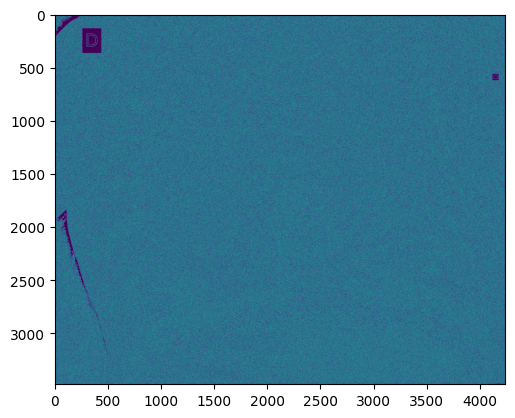

In [13]:
# EXTENDED ACTIVITY
# 1. From the DICOM image, detect the edges in the image and visualize the output.
## ATTEMPT #3: Using Canny
dcm_edge = cv2.Canny(dcm_imgCopy, threshold1=0.1, threshold2=0.10011)
plt.imshow(dcm_edge)
plt.show()

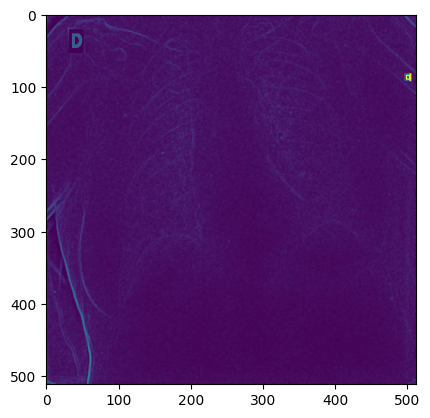

In [58]:
## ATTEMPT #4: Perform morphology gradient to emphasize edges
dcm_resize512 = cv2.resize(dcm_img, dsize=(512,512), interpolation = cv2.INTER_NEAREST)

# # do morphology gradient
kernel = cv2.getStructuringElement(cv2.MORPH_RECT , (3,3))
morph = cv2.morphologyEx(dcm_resize512, cv2.MORPH_GRADIENT, kernel)

# apply gain
dcm_edge2 = cv2.multiply(morph, 5)

plt.imshow(dcm_edge2)
plt.show()

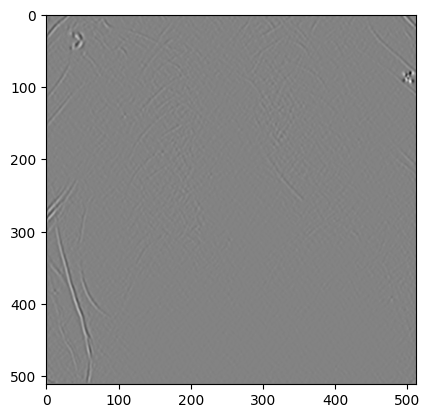

In [50]:
## ATTEMPT #5: Perform Sobel from morphed image
dcm_edge3 = cv2.Sobel(src=dcm_edge2, ddepth=cv2.CV_64F, dx=2, dy=1, ksize=15)

plt.imshow(dcm_edge3, cmap='gray')
plt.show()

In [ ]:
# FOR REFERENCE: cannyEdgeDetector

# # from scipy import ndimage
# # from scipy.ndimage.filters import convolve

# # from scipy import misc
# # import numpy as np

# class cannyEdgeDetector:
#     def __init__(self, imgs, sigma=1, kernel_size=5, weak_pixel=75, strong_pixel=255, lowthreshold=0.05, highthreshold=0.15):
#         self.imgs = imgs
#         self.imgs_final = []
#         self.img_smoothed = None
#         self.gradientMat = None
#         self.thetaMat = None
#         self.nonMaxImg = None
#         self.thresholdImg = None
#         self.weak_pixel = weak_pixel
#         self.strong_pixel = strong_pixel
#         self.sigma = sigma
#         self.kernel_size = kernel_size
#         self.lowThreshold = lowthreshold
#         self.highThreshold = highthreshold
#         return 
    
#     def gaussian_kernel(self, size, sigma=1):
#         size = int(size) // 2
#         x, y = np.mgrid[-size:size+1, -size:size+1]
#         normal = 1 / (2.0 * np.pi * sigma**2)
#         g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
#         return g
    
#     def sobel_filters(self, img):
#         Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
#         Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

#         Ix = ndimage.filters.convolve(img, Kx)
#         Iy = ndimage.filters.convolve(img, Ky)

#         G = np.hypot(Ix, Iy)
#         G = G / G.max() * 255
#         theta = np.arctan2(Iy, Ix)
#         return (G, theta)
    

#     def non_max_suppression(self, img, D):
#         M, N = img.shape
#         Z = np.zeros((M,N), dtype=np.int32)
#         angle = D * 180. / np.pi
#         angle[angle < 0] += 180


#         for i in range(1,M-1):
#             for j in range(1,N-1):
#                 try:
#                     q = 255
#                     r = 255

#                    #angle 0
#                     if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
#                         q = img[i, j+1]
#                         r = img[i, j-1]
#                     #angle 45
#                     elif (22.5 <= angle[i,j] < 67.5):
#                         q = img[i+1, j-1]
#                         r = img[i-1, j+1]
#                     #angle 90
#                     elif (67.5 <= angle[i,j] < 112.5):
#                         q = img[i+1, j]
#                         r = img[i-1, j]
#                     #angle 135
#                     elif (112.5 <= angle[i,j] < 157.5):
#                         q = img[i-1, j-1]
#                         r = img[i+1, j+1]

#                     if (img[i,j] >= q) and (img[i,j] >= r):
#                         Z[i,j] = img[i,j]
#                     else:
#                         Z[i,j] = 0


#                 except IndexError as e:
#                     pass

#         return Z

#     def threshold(self, img):

#         highThreshold = img.max() * self.highThreshold;
#         lowThreshold = highThreshold * self.lowThreshold;

#         M, N = img.shape
#         res = np.zeros((M,N), dtype=np.int32)

#         weak = np.int32(self.weak_pixel)
#         strong = np.int32(self.strong_pixel)

#         strong_i, strong_j = np.where(img >= highThreshold)
#         zeros_i, zeros_j = np.where(img < lowThreshold)

#         weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

#         res[strong_i, strong_j] = strong
#         res[weak_i, weak_j] = weak

#         return (res)

#     def hysteresis(self, img):

#         M, N = img.shape
#         weak = self.weak_pixel
#         strong = self.strong_pixel

#         for i in range(1, M-1):
#             for j in range(1, N-1):
#                 if (img[i,j] == weak):
#                     try:
#                         if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
#                             or (img[i, j-1] == strong) or (img[i, j+1] == strong)
#                             or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
#                             img[i, j] = strong
#                         else:
#                             img[i, j] = 0
#                     except IndexError as e:
#                         pass

#         return img
    
#     def detect(self):
#         imgs_final = []
#         for i, img in enumerate(self.imgs):    
#             self.img_smoothed = convolve(img, self.gaussian_kernel(self.kernel_size, self.sigma))
#             self.gradientMat, self.thetaMat = self.sobel_filters(self.img_smoothed)
#             self.nonMaxImg = self.non_max_suppression(self.gradientMat, self.thetaMat)
#             self.thresholdImg = self.threshold(self.nonMaxImg)
#             img_final = self.hysteresis(self.thresholdImg)
#             self.imgs_final.append(img_final)

#         return self.imgs_final